# Береза К.В. (0374) 
## Вариант 86 (1 задача)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Функции

In [2]:
def income1(x):
    return 80 + 0.7 * x**(3/4)

def income2(x):
    return 50 + 1.5 * x**(2/3)

def remainder1(x):
    return 0.63 * x

def remainder2(x):
    return 0.79 * x

def f(x):
    return income1(x) + remainder1(x)

def g(x):
    return income2(x) + remainder2(x)

def goalFunc(x):
    return -(f(x[0]) + g(x[1]))

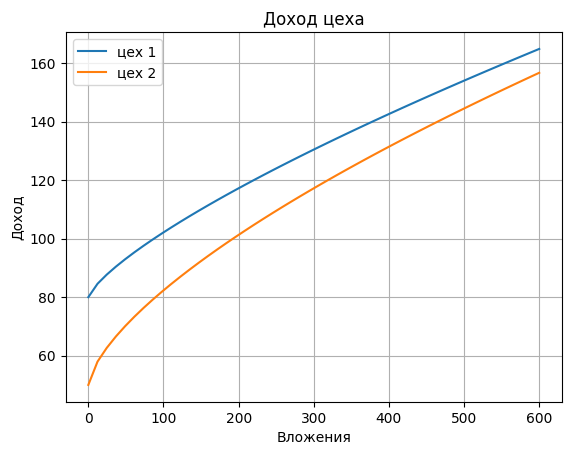

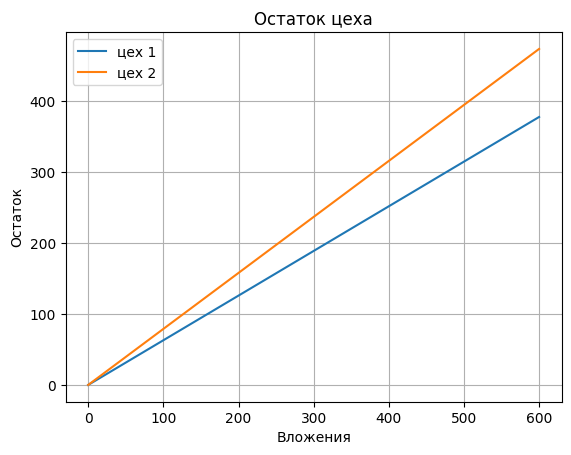

In [3]:
limit = 600
x = np.linspace(0, limit)

plt.plot(x, income1(x))
plt.plot(x, income2(x))
plt.legend(['цех 1', 'цех 2'])
plt.title("Доход цеха")
plt.xlabel('Вложения')
plt.ylabel('Доход')
plt.grid()
plt.show()

plt.plot(x, remainder1(x))
plt.plot(x, remainder2(x))
plt.legend(['цех 1', 'цех 2'])
plt.title("Остаток цеха")
plt.xlabel('Вложения')
plt.ylabel('Остаток')
plt.grid()
plt.show()

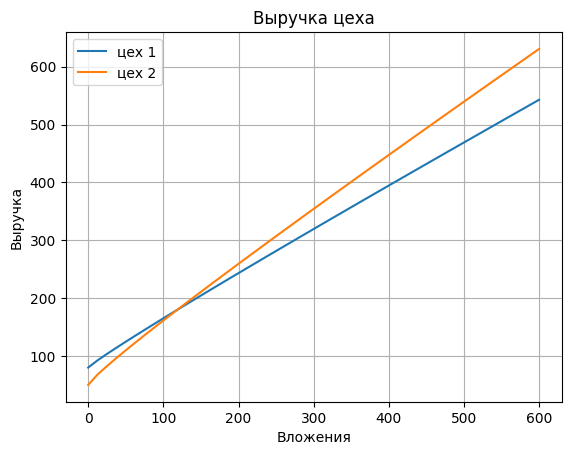

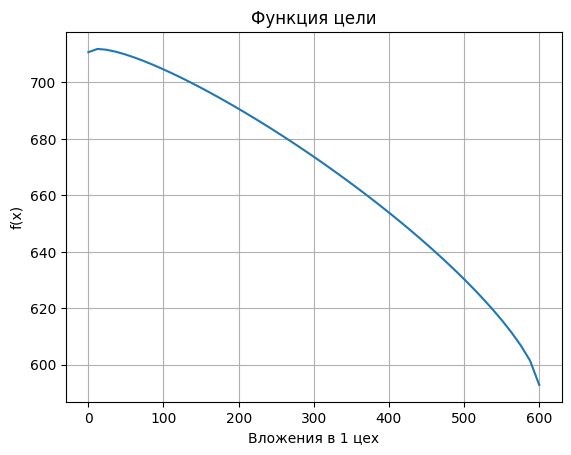

In [4]:
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.legend(['цех 1', 'цех 2'])
plt.title("Выручка цеха")
plt.xlabel('Вложения')
plt.ylabel('Выручка')
plt.grid()
plt.show()

y = np.array([-goalFunc([xi, limit - xi]) for xi in x])

plt.plot(x, y)
plt.xlabel('Вложения в 1 цех')
plt.ylabel('f(x)')
plt.title('Функция цели')
plt.grid()
plt.show()

## Решение 1

In [5]:
# Каждый квартал находим оптимальные вложения для цехов
total = 145
optimal_x, optimal_y = 0, 0
step_size = 0.01

for i in range(4):
    maximum = 0
    num_samples = int(total / step_size) + 1
    ls = np.linspace(0, total, num_samples)
    
    for x in ls:
        y = total - x
        if -goalFunc([x, y]) > maximum:
            maximum = -goalFunc([x, y])
            optimal_x = x
            optimal_y = y
            
    total = maximum
    print(i + 1, 'квартал')
    print("Оптимальное количество вложенных средств для первого цеха: ", optimal_x)
    print("Оптимальное количество вложенных средств для первого цеха: ", optimal_y)
    print("Максимальный доход: ", maximum)

1 квартал
Оптимальное количество вложенных средств для первого цеха:  4.92
Оптимальное количество вложенных средств для первого цеха:  140.08
Максимальный доход:  286.53364530649765
2 квартал
Оптимальное количество вложенных средств для первого цеха:  7.900100505780656
Оптимальное количество вложенных средств для первого цеха:  278.633544800717
Максимальный доход:  422.38631797074095
3 квартал
Оптимальное количество вложенных средств для первого цеха:  10.12015137521639
Оптимальное количество вложенных средств для первого цеха:  412.26616659552457
Максимальный доход:  549.1266842965132
4 квартал
Оптимальное количество вложенных средств для первого цеха:  11.840144125274469
Оптимальное количество вложенных средств для первого цеха:  537.2865401712387
Максимальный доход:  665.5190395186623


## Решение 2

In [6]:
# Ограничения
constraints = [
    {'type': 'eq', 'fun': lambda x: x[0] + x[1] - total},  # x[0] + x[1] = total
    {'type': 'ineq', 'fun': lambda x: x[0]},  # x[0] >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]},  # x[1] >= 0
]

In [7]:
# Каждый квартал находим оптимальные вложения для цехов
total = 145

for i in range(4):
    x = [0, total]

    res = minimize(goalFunc, x, constraints=constraints)
    total = -res.fun

    print(i + 1, 'квартал')
    print("Оптимальное количество вложенных средств для первого цеха: ", res.x[0])
    print("Оптимальное количество вложенных средств для первого цеха: ", res.x[1])
    print("Максимальный доход: ", -res.fun)

1 квартал
Оптимальное количество вложенных средств для первого цеха:  4.917354728938173
Оптимальное количество вложенных средств для первого цеха:  140.08264527106184
Максимальный доход:  286.5336453527322
2 квартал
Оптимальное количество вложенных средств для первого цеха:  7.901235904922407
Оптимальное количество вложенных средств для первого цеха:  278.63240944780983
Максимальный доход:  422.3863180580988
3 квартал
Оптимальное количество вложенных средств для первого цеха:  10.118962452919744
Оптимальное количество вложенных средств для первого цеха:  412.2673556051791
Максимальный доход:  549.1266843866466
4 квартал
Оптимальное количество вложенных средств для первого цеха:  11.843254329764445
Оптимальное количество вложенных средств для первого цеха:  537.2834300568821
Максимальный доход:  665.519039616717
